## Import the required libraries

In [79]:
# Basic libraries
import pandas as pd # 用于处理数据的工具
from tqdm import tqdm # 显示循环的进度条工具
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import StandardScaler

## Load the dataset

In [80]:
# 数据准备
train_dataset = pd.read_csv("./data/train_dataset.csv") # 原始训练数据。
test_dataset = pd.read_csv("./data/test_dataset.csv") # 原始测试数据。
sampleSubmission = pd.read_csv('./data/SampleSubmission.csv')# 提交样例。

submit = pd.DataFrame() # 定义提交的最终数据。
submit["ID"] = sampleSubmission["ID"] # 对齐测试数据的序号。


## Exploratory Data Analysis

In [59]:
# data shape
train_dataset.shape, test_dataset.shape

((455, 14), (50, 14))

In [60]:
# data type
train_dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PIRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [61]:
# Statistical Features of data
train_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,3.989784,10.912088,11.664110,0.072527,0.561758,6.263266,70.344835,3.664227,10.092308,420.778022,18.519780,353.272593,12.963385,22.212308
std,8.993398,23.130233,6.974787,0.259645,0.118627,0.704493,27.697196,2.118137,9.002217,172.326926,2.165215,95.557626,7.239069,9.241754
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.500000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084170,0.000000,5.190000,0.000000,0.453000,5.877500,47.200000,2.005550,4.000000,281.000000,17.400000,372.860000,7.205000,16.450000
50%,0.289600,0.000000,10.010000,0.000000,0.538000,6.193000,81.300000,2.894400,5.000000,358.000000,19.100000,391.450000,11.690000,20.800000
75%,4.548895,0.000000,18.100000,0.000000,0.647000,6.611000,94.650000,4.812200,24.000000,666.000000,20.200000,396.375000,17.200000,24.800000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [62]:
train_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [63]:
test_dataset.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
0,1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
1,2,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,3,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
3,4,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
4,5,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93


In [64]:
submit.head()

,ID
0,id_1
1,id_2
2,id_3
3,id_4
4,id_5


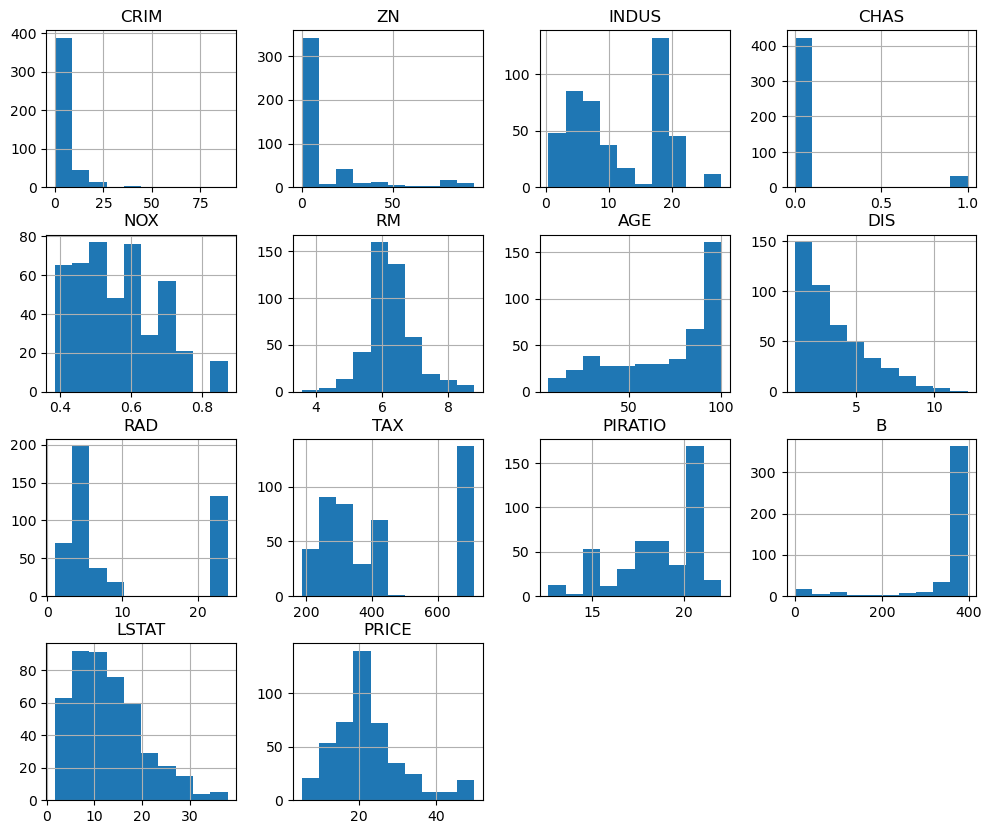

In [81]:
import matplotlib.pyplot as plt
# Variables distribution (histogram)
train_dataset.hist(figsize=[12,10])
plt.show()

### Correlation Matrix

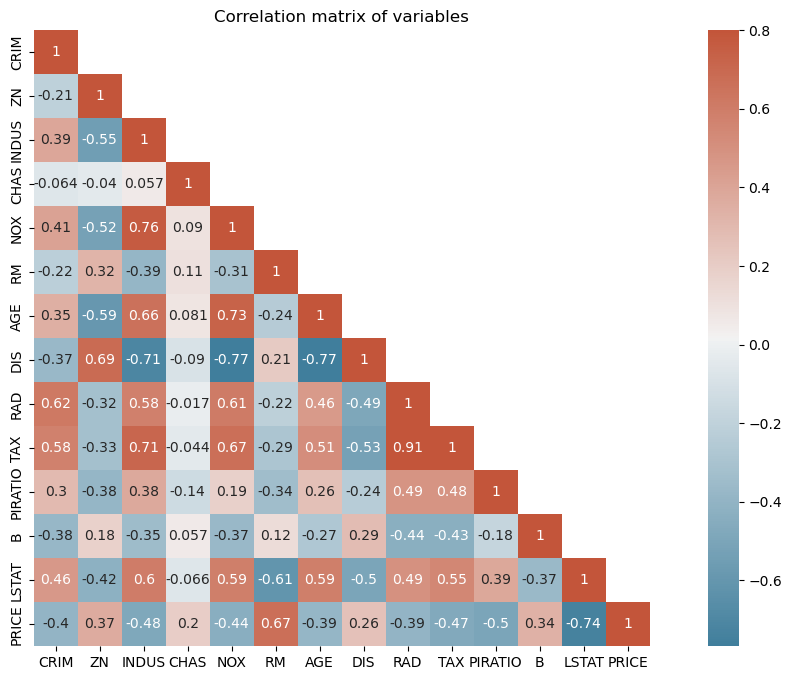

In [66]:
# Compute the correlation matrix
correlations=train_dataset.corr()
# Generate a mask for the upper triangle
mask=np.array(correlations)
mask[np.tril_indices_from(mask)]=False
# Set up the matplotlib figure
fig,ax=plt.subplots(figsize=(15,8))
# Heat map for correlation matrix of variables
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlations,cmap=cmap,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of variables')
plt.show()

## Standardiztion of Data

In [82]:
train_features = train_dataset.drop(columns=['PRICE'], axis=1)
train_features.head()   # 特征数据

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [83]:
train_label = train_dataset['PRICE']
train_label.head()  # 价格

0    24.0
1    21.6
2    34.7
3    33.4
4    18.9
Name: PRICE, dtype: float64

In [84]:
test_features = test_dataset.drop(columns=['ID'], axis=1)
test_features.head()  # 测试特征数据

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
3,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
4,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93


In [89]:
# 标准化train_features和test_features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [90]:
train_features = pd.DataFrame(train_features, columns=train_dataset.columns[:-1])
# train_features.head()
train_features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
count,455.000000,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,0.000000,1.952040e-17,3.591754e-16,-1.015061e-16,5.621877e-16,-5.934203e-16,1.873959e-16,2.030122e-16,1.249306e-16,3.123265e-17,1.561632e-15,-3.747918e-16,-1.561632e-17
std,1.001101,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-0.443420,-4.722866e-01,-1.608141e+00,-2.796409e-01,-1.491666e+00,-3.839980e+00,-2.307638e+00,-1.197948e+00,-1.011119e+00,-1.358089e+00,-2.737048e+00,-3.697676e+00,-1.553480e+00
25%,-0.434754,-4.722866e-01,-9.292379e-01,-2.796409e-01,-9.178112e-01,-5.481819e-01,-8.365580e-01,-7.839450e-01,-6.775013e-01,-8.120140e-01,-5.177375e-01,2.052057e-01,-7.963349e-01
50%,-0.411886,-4.722866e-01,-2.374167e-01,-2.796409e-01,-2.004930e-01,-9.984945e-02,3.959687e-01,-3.638454e-01,-5.662952e-01,-3.646971e-01,2.682683e-01,3.999621e-01,-1.760981e-01
75%,0.062237,-4.722866e-01,9.237521e-01,-2.796409e-01,7.193621e-01,4.941378e-01,8.784975e-01,5.425696e-01,1.546619e+00,1.424571e+00,7.768603e-01,4.515584e-01,5.858873e-01
max,9.460269,3.639413e+00,2.307395e+00,3.576014e+00,2.609707e+00,3.576335e+00,1.071870e+00,3.999547e+00,1.546619e+00,1.685990e+00,1.609102e+00,4.570585e-01,3.458199e+00


In [91]:
test_features = pd.DataFrame(test_features, columns=test_dataset.columns[1:])
test_features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PIRATIO,B,LSTAT
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.415011,0.120664,-0.736274,-0.125415,-0.577735,0.291585,-0.625836,0.581642,-0.599657,-0.718136,-0.268990,0.352322,-0.409368
std,0.031787,0.949298,0.409844,0.763222,0.482591,0.947808,1.000788,0.719383,0.203757,0.321975,0.961665,0.158339,0.762649
min,-0.441951,-0.472287,-1.476092,-0.279641,-1.381958,-0.986567,-2.437758,-0.723755,-1.011119,-1.189619,-2.552105,-0.522276,-1.518907
25%,-0.438345,-0.472287,-1.062722,-0.279641,-1.023932,-0.334318,-1.357942,0.126724,-0.677501,-0.963056,-0.748916,0.319032,-0.980262
50%,-0.429155,-0.472287,-0.784271,-0.279641,-0.474762,0.052200,-0.502222,0.447570,-0.621898,-0.675495,-0.055381,0.396295,-0.636608
75%,-0.401336,0.393334,-0.505820,-0.279641,-0.200493,0.717238,0.092355,1.071481,-0.566295,-0.637735,0.314504,0.443596,0.072481
max,-0.306931,2.990197,0.167342,3.576014,0.719362,2.946822,1.071870,2.627211,-0.232677,0.053573,1.146745,0.457059,2.346336


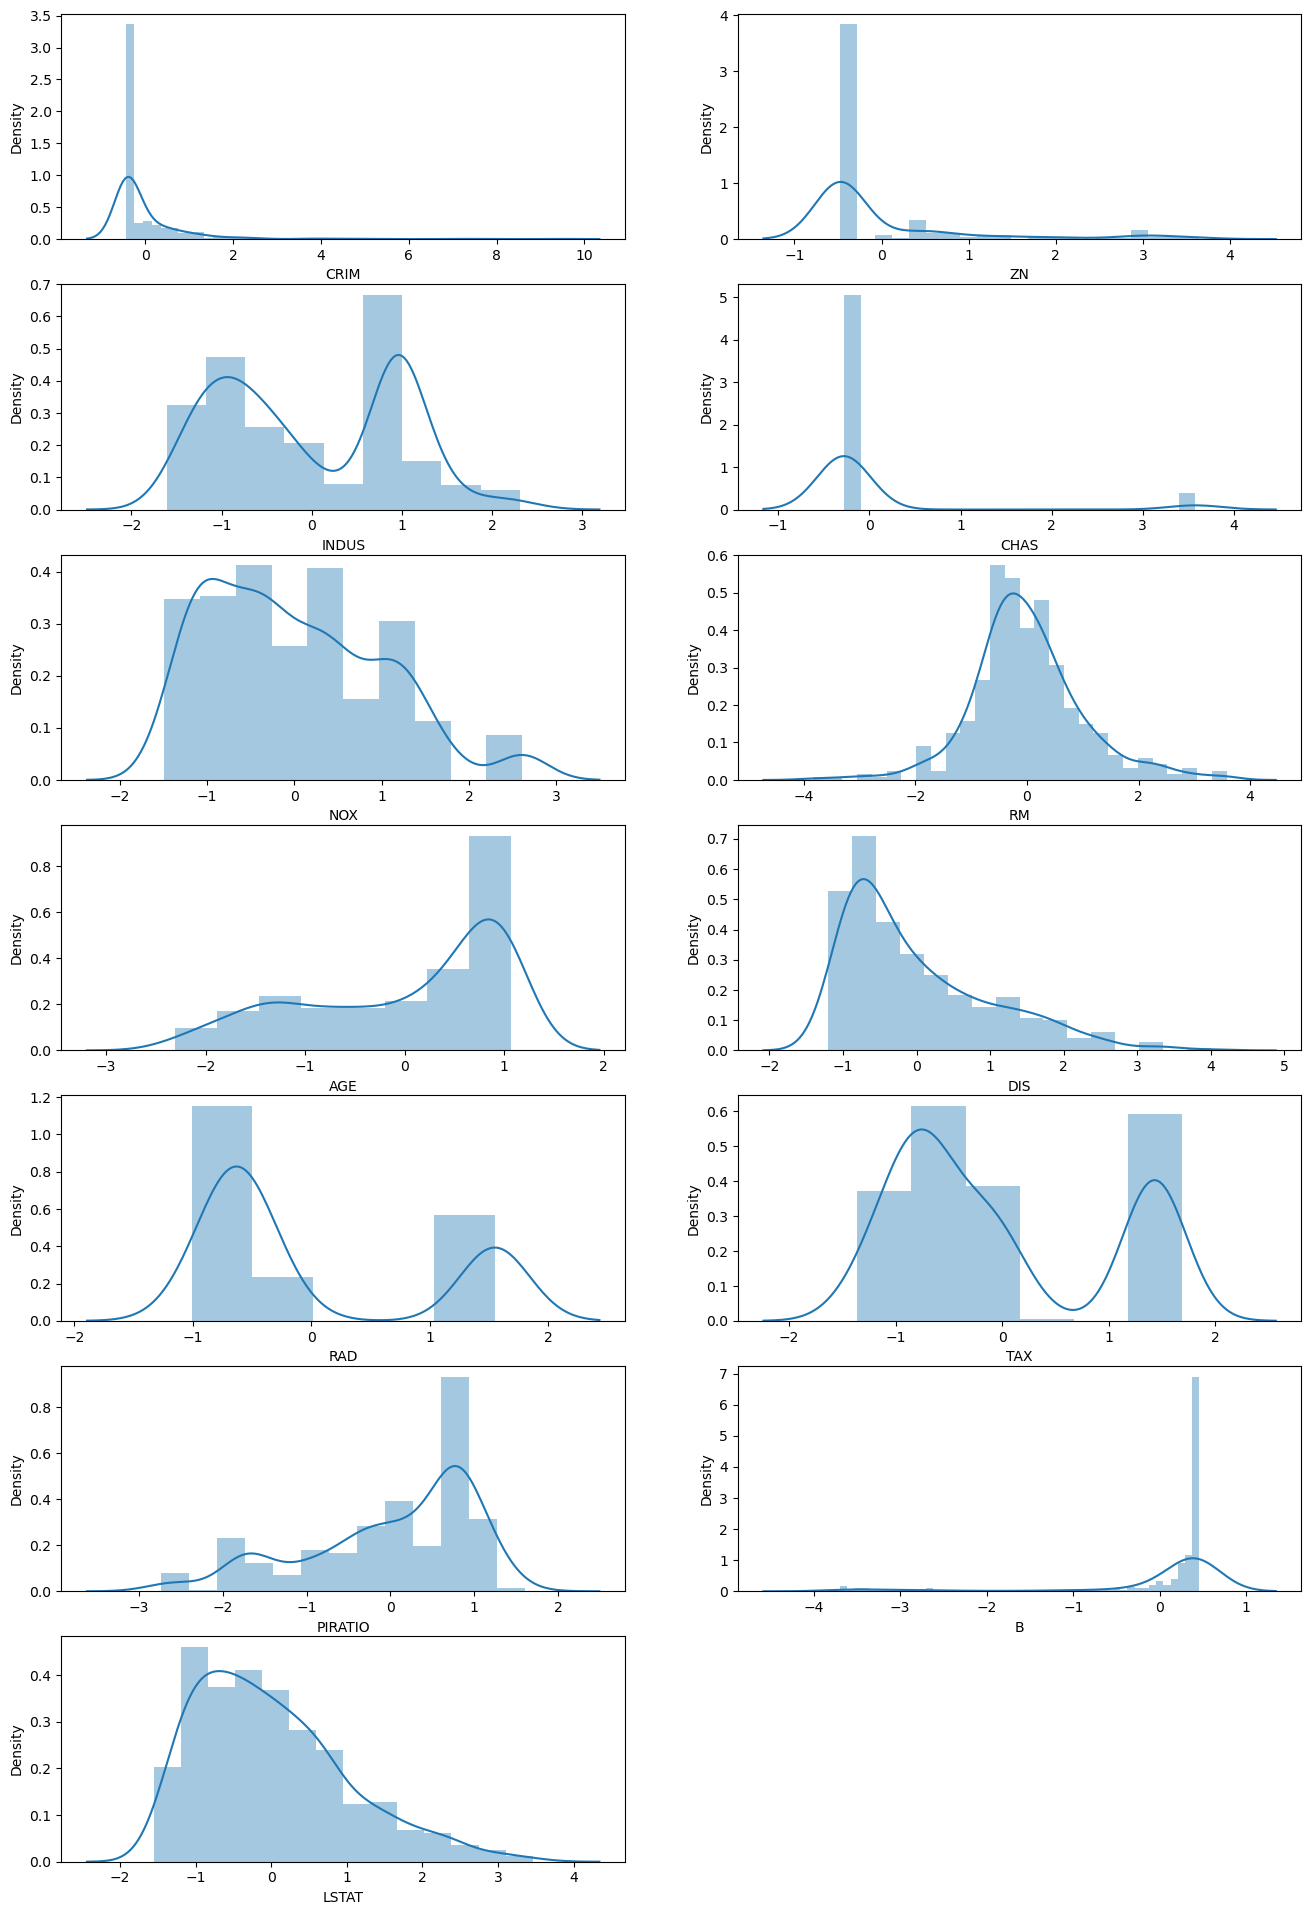

In [92]:
# lets look at the shape of data after scaling
pos = 1
fig = plt.figure(figsize=(16,24))
for i in train_features.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(train_features[i],ax=ax)

## Dimensionality Reduction

### PCA

In [93]:
from sklearn.decomposition import PCA
# 创建PCA对象，n_components参数表示要保留的主成分数量
pca = PCA(n_components=13, random_state=42)

# 使用训练数据拟合PCA模型

pca.fit(train_features)

# 将训练和测试数据转换为主成分
train_pca_features = pca.transform(train_features)
test_pca_features = pca.transform(test_features)


<Axes: >

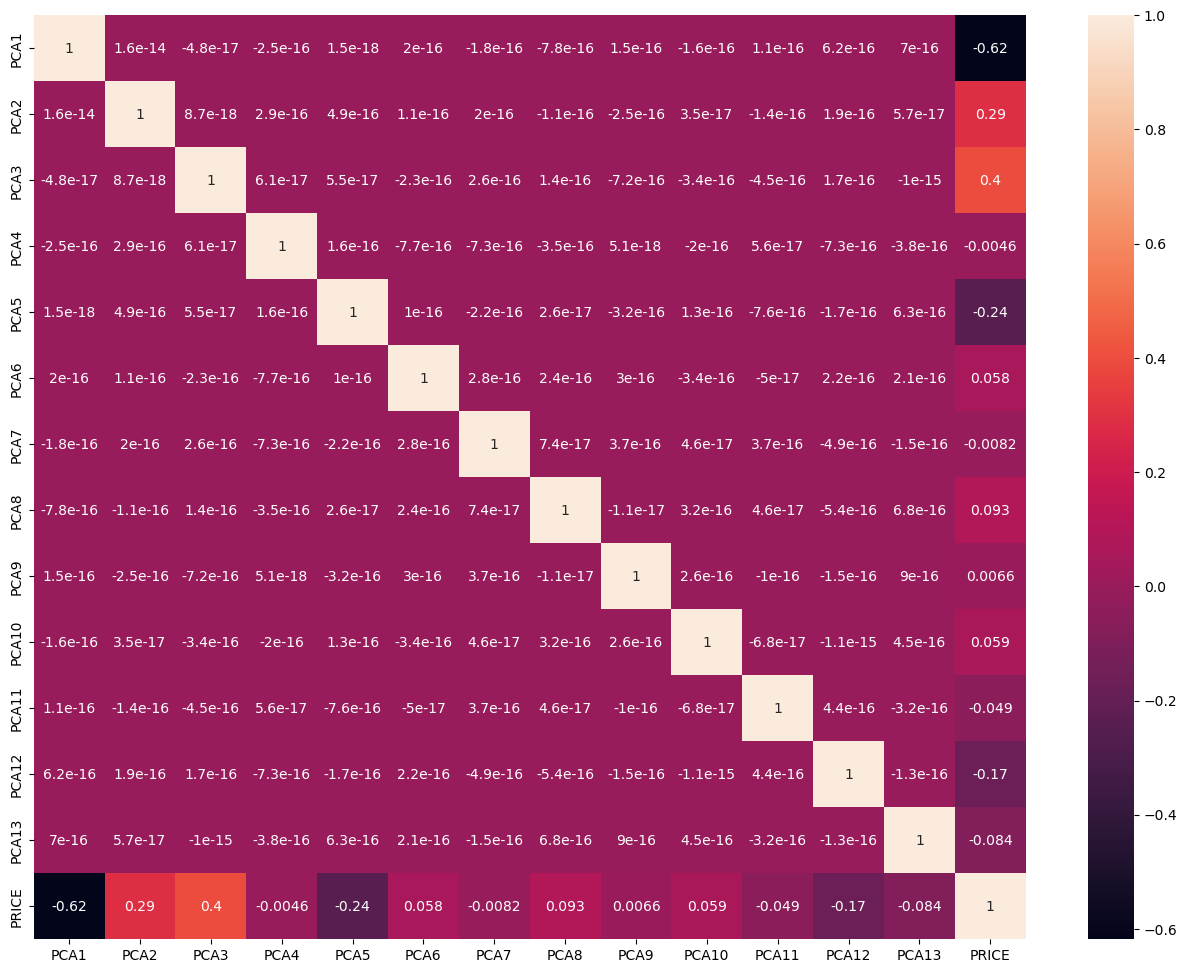

In [94]:
train_features_std_pca = pd.DataFrame(train_pca_features,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])
train_features_std_pca['PRICE'] = train_label
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(train_features_std_pca.corr(),annot=True)

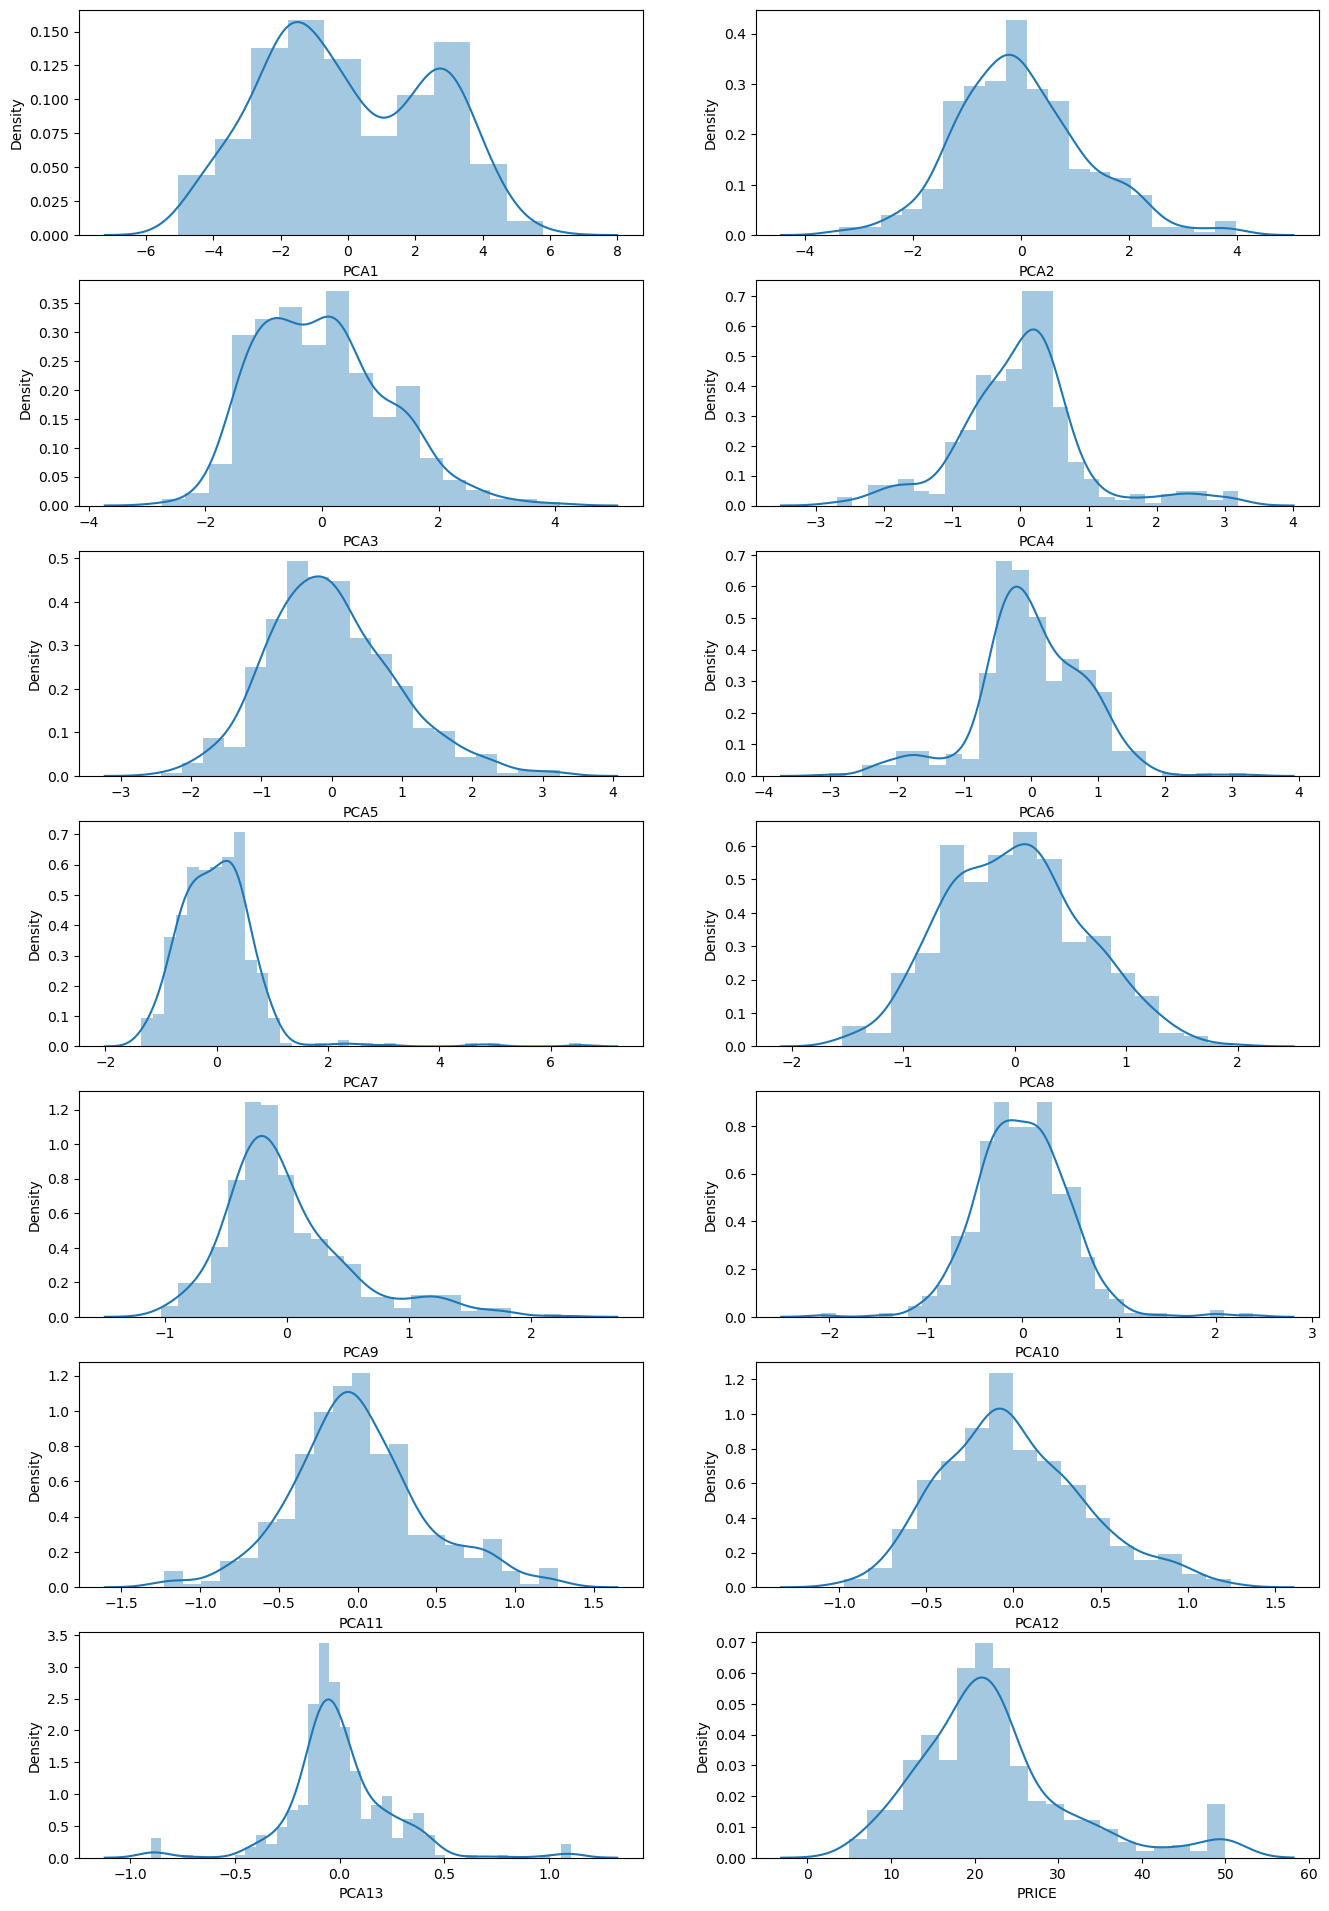

In [95]:
# Lets look at the distribution of our features after applying PCA
pos = 1
fig = plt.figure(figsize=(16,24))
for i in train_features_std_pca.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(train_features_std_pca[i],ax=ax)


In [98]:
# LinerRegression
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
# Lets train our model on training data and predict also on training to see results
model = CatBoostRegressor()
model.fit(train_pca_features,train_label)
y_predicted = model.predict(test_pca_features)

# save predicted label of test set to submit_result.csv
submit['value'] = y_predicted
submit.to_csv('./ML_models/submit_CatBst_PCA.csv', index=False)
print(submit.shape)
submit.head()


Learning rate set to 0.036153
0:	learn: 9.0725651	total: 1.56ms	remaining: 1.56s
1:	learn: 8.8912123	total: 3.08ms	remaining: 1.53s
2:	learn: 8.7431656	total: 4.21ms	remaining: 1.4s
3:	learn: 8.5804564	total: 5.28ms	remaining: 1.31s
4:	learn: 8.4065870	total: 6.43ms	remaining: 1.28s
5:	learn: 8.2603119	total: 7.76ms	remaining: 1.28s
6:	learn: 8.1089257	total: 9.2ms	remaining: 1.3s
7:	learn: 7.9586246	total: 10.5ms	remaining: 1.3s
8:	learn: 7.8098910	total: 11.7ms	remaining: 1.28s
9:	learn: 7.6562859	total: 12.7ms	remaining: 1.26s
10:	learn: 7.5219967	total: 14.1ms	remaining: 1.27s
11:	learn: 7.3935746	total: 15.2ms	remaining: 1.25s
12:	learn: 7.2656211	total: 16.4ms	remaining: 1.25s
13:	learn: 7.1555349	total: 17.8ms	remaining: 1.25s
14:	learn: 7.0280014	total: 19ms	remaining: 1.25s
15:	learn: 6.9219196	total: 20.3ms	remaining: 1.25s
16:	learn: 6.8102451	total: 21.6ms	remaining: 1.25s
17:	learn: 6.7146156	total: 23ms	remaining: 1.25s
18:	learn: 6.6265099	total: 24.4ms	remaining: 1.26s


,ID,value
0,id_1,30.941064
1,id_2,25.055226
2,id_3,20.774953
3,id_4,16.194405
4,id_5,14.110916
